link: https://colab.research.google.com/drive/15HnwH-L9Y0kSESM-jvTeD05hLowtGeZt?usp=sharing

**About NETFLIX**

Netflix is one of the most popular media and video streaming platforms. They have over 10000 movies or tv shows available on their platform, as of mid-2021, they have over 222M Subscribers globally. This tabular dataset consists of listings of all the movies and tv shows available on Netflix, along with details such as - cast, directors, ratings, release year, duration, etc.

**Business Problem**

Analyze the data and generate insights that could help Netflix ijn deciding which type of shows/movies to produce and how they can grow the business in different countries


The dataset provided to you consists of a list of all the TV shows/movies available on Netflix:

* Show_id: Unique ID for every Movie / Tv Show
* Type: Identifier - A Movie or TV Show
* Title: Title of the Movie / Tv Show
* Director: Director of the Movie
* Cast: Actors involved in the movie/show
* Country: Country where the movie/show was produced
* Date_added: Date it was added on Netflix
* Release_year: Actual Release year of the movie/show
* Rating: TV Rating of the movie/show
* Duration: Total Duration - in minutes or number of seasons
* Listed_in: Genre


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Basic Analysis

In [ ]:
netflix=pd.read_csv("/content/drive/MyDrive/netflix.csv")

In [ ]:
df=netflix.copy()

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
df.shape

(8807, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

#1. Handling null values

**Rating**

In [ ]:
df[df['rating'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5989,s5990,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"Oprah Winfrey, Ava DuVernay",NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
6827,s6828,TV Show,Gargantia on the Verdurous Planet,NaN,"Kaito Ishikawa, Hisako Kanemoto, Ai Kayano, Ka...",Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
7312,s7313,TV Show,Little Lunch,NaN,"Flynn Curry, Olivia Deeble, Madison Lu, Oisín ...",Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
7537,s7538,Movie,My Honor Was Loyalty,Alessandro Pepe,"Leone Frisa, Paolo Vaccarino, Francesco Miglio...",Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [ ]:
rating_={}
rating_['Movie']=df[df['type']=='Movie']['rating'].mode()[0]
rating_['Movie']

'TV-MA'

In [ ]:
rating_['TV Show']=df[df['type']=='TV Show']['rating'].mode()[0]
rating_['TV Show']

'TV-MA'

In [ ]:
# Replacing the null values with mode
df['rating'] =df.apply(lambda x: rating_['Movie'] if x['type']=='Movie' and pd.isna(x['rating'])
else rating_['TV Show']if x['type']=='TV Show' and pd.isna(x['rating']) else x['rating'],axis=1 )

**Duration**

In [ ]:
df[df['duration'].isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,"April 4, 2017",2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,"September 16, 2016",2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,"August 15, 2016",2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [ ]:
duration_={}
duration_['Movie']=df[df['type']=='Movie']['duration'].mode()[0]
duration_['Movie']

'90 min'

In [ ]:
duration_['TV Show']=df[df['type']=='TV Show']['duration'].mode()[0]
duration_['TV Show']

'1 Season'

In [ ]:
df['duration'] =df.apply(lambda x: duration_['Movie'] if x['type']=='Movie' and pd.isna(x['duration'])
else duration_['TV Show']if x['type']=='TV Show' and pd.isna(x['duration']) else x['duration'],axis=1 )

In [ ]:
df['director'] = df['director'].fillna("unknown director")
df['cast'] = df['cast'].fillna("unknown actor")
df['country'] = df['country'].fillna("unknown country")

In [ ]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actor,unknown country,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,unknown director,unknown actor,unknown country,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.reset_index(drop=True,inplace=True)

In [ ]:
df.duplicated().sum()

0

#2. Un-nesting the columns

In [ ]:
def unnesting(df,split_col,name):
  data_ = df[split_col].apply(lambda x:x.split(", ")).tolist() # spliting the data
  return pd.DataFrame(data_, index = df['title']).stack().reset_index().drop(columns = "level_1").rename(columns = {0:name}) # into dataframe

**Directors**

In [ ]:
column_name = 'directors'
directors = unnesting(df,'director',column_name)
directors.head(25)

,title,directors
0,Dick Johnson Is Dead,Kirsten Johnson
1,Blood & Water,unknown director
2,Ganglands,Julien Leclercq
3,Jailbirds New Orleans,unknown director
4,Kota Factory,unknown director
5,Midnight Mass,Mike Flanagan
6,My Little Pony: A New Generation,Robert Cullen
7,My Little Pony: A New Generation,José Luis Ucha
8,Sankofa,Haile Gerima
9,The Great British Baking Show,Andy Devonshire


**Country**

In [ ]:
column_name = 'country'
country = unnesting(df,'country',column_name)
country.head(22)

,title,country
0,Dick Johnson Is Dead,United States
1,Blood & Water,South Africa
2,Ganglands,unknown country
3,Jailbirds New Orleans,unknown country
4,Kota Factory,India
5,Midnight Mass,unknown country
6,My Little Pony: A New Generation,unknown country
7,Sankofa,United States
8,Sankofa,Ghana
9,Sankofa,Burkina Faso


**Cast**

In [ ]:
column_name = 'cast'
cast = unnesting(df,'cast',column_name)
cast.head(25)

,title,cast
0,Dick Johnson Is Dead,unknown actor
1,Blood & Water,Ama Qamata
2,Blood & Water,Khosi Ngema
3,Blood & Water,Gail Mabalane
4,Blood & Water,Thabang Molaba
5,Blood & Water,Dillon Windvogel
6,Blood & Water,Natasha Thahane
7,Blood & Water,Arno Greeff
8,Blood & Water,Xolile Tshabalala
9,Blood & Water,Getmore Sithole


**listed_in**

In [ ]:
column_name = 'listed_in'
listed_in = unnesting(df,'listed_in',column_name)
listed_in.head(25)

,title,listed_in
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
5,Ganglands,International TV Shows
6,Ganglands,TV Action & Adventure
7,Jailbirds New Orleans,Docuseries
8,Jailbirds New Orleans,Reality TV
9,Kota Factory,International TV Shows


In [ ]:
df[df['type']=='Movie']['duration']

0        90 min
6        91 min
7       125 min
9       104 min
12      127 min
         ...   
8791     96 min
8792    158 min
8794     88 min
8795     88 min
8796    111 min
Name: duration, Length: 6131, dtype: object

In [ ]:
df['minutes'] = df[df['type']=='Movie']['duration'].apply(lambda x:x.split(" ")[0]).astype('float64')

In [ ]:
df['season'] = df[df['type']=='TV Show']['duration'].apply(lambda x:int(x.split(" ")[0]))

In [ ]:
df['date_added'] = pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'].dt.weekday

0       5
1       4
2       4
3       4
4       4
       ..
8792    2
8793    0
8794    4
8795    5
8796    5
Name: date_added, Length: 8797, dtype: int64

In [ ]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,season
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,unknown actor,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,NaN
1,s2,TV Show,Blood & Water,unknown director,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",NaN,2.0
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",unknown country,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,NaN,1.0
3,s4,TV Show,Jailbirds New Orleans,unknown director,unknown actor,unknown country,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",NaN,1.0
4,s5,TV Show,Kota Factory,unknown director,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,NaN,2.0


In [ ]:
df.describe()

,release_year,minutes,season
count,8797.000000,6131.000000,2666.000000
mean,2014.183472,99.572500,1.751313
std,8.822191,28.284463,1.550176
min,1925.000000,3.000000,1.000000
25%,2013.000000,87.000000,1.000000
50%,2017.000000,98.000000,1.000000
75%,2019.000000,114.000000,2.000000
max,2021.000000,312.000000,17.000000


In [ ]:
df.dtypes

show_id                 object
type                    object
title                   object
director                object
cast                    object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
description             object
minutes                float64
season                 float64
dtype: object

# 1. Find the counts of each categorical variable both using graphical and non-graphical analysis.

#a. For Non-graphical Analysis:

In [ ]:
var1 = df['listed_in'].apply(lambda x: str(x).split(', ')).tolist()
df_new1 = pd.DataFrame(var1,index=df['title'])
df_new1 = df_new1.stack()
df_new1 = pd.DataFrame(df_new1.reset_index())
df_new1.rename(columns={0:'Genre'},inplace=True)
df_new1.drop(['level_1'],axis=1,inplace=True)
df_new1

,title,Genre
0,Dick Johnson Is Dead,Documentaries
1,Blood & Water,International TV Shows
2,Blood & Water,TV Dramas
3,Blood & Water,TV Mysteries
4,Ganglands,Crime TV Shows
...,...,...
19298,Zoom,Children & Family Movies
19299,Zoom,Comedies
19300,Zubaan,Dramas
19301,Zubaan,International Movies


In [ ]:
df_new1['Genre'].value_counts()

International Movies            2752
Dramas                          2427
Comedies                        1674
International TV Shows          1350
Documentaries                    869
Action & Adventure               859
TV Dramas                        762
Independent Movies               756
Children & Family Movies         641
Romantic Movies                  616
Thrillers                        577
TV Comedies                      574
Crime TV Shows                   469
Kids' TV                         449
Docuseries                       394
Music & Musicals                 375
Romantic TV Shows                370
Horror Movies                    357
Stand-Up Comedy                  343
Reality TV                       255
British TV Shows                 252
Sci-Fi & Fantasy                 243
Sports Movies                    219
Anime Series                     175
Spanish-Language TV Shows        173
TV Action & Adventure            167
Korean TV Shows                  151
C

In [ ]:
top_10_genre = df_new1['Genre'].value_counts().head(10)
print(top_10_genre)

print('*'*100)
top_10_country = df['country'].value_counts().head(10)
print(top_10_country)

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: Genre, dtype: int64
****************************************************************************************************
United States      2812
India               972
unknown country     830
United Kingdom      418
Japan               244
South Korea         199
Canada              181
Spain               145
France              124
Mexico              110
Name: country, dtype: int64


#b. For graphical analysis:

<ipython-input-39-53c139a59d50>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Genre',data = df_new1,order=top_10_genre_index,palette=custom_palette)


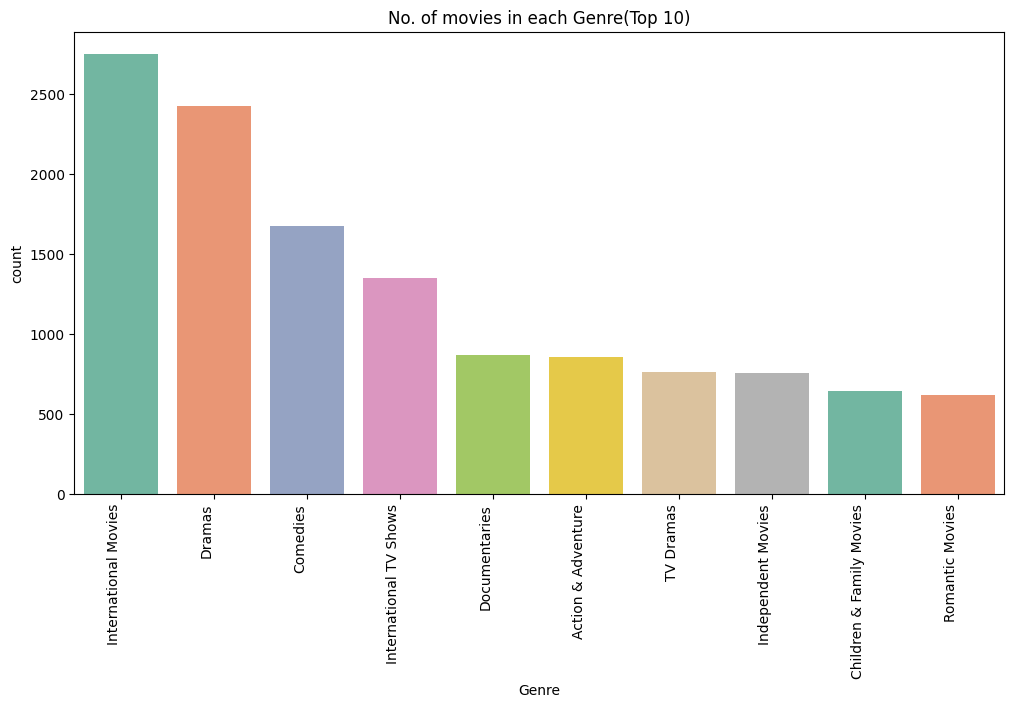

International Movies        2752
Dramas                      2427
Comedies                    1674
International TV Shows      1350
Documentaries                869
Action & Adventure           859
TV Dramas                    762
Independent Movies           756
Children & Family Movies     641
Romantic Movies              616
Name: Genre, dtype: int64


In [ ]:
top_10_genre = df_new1['Genre'].value_counts().head(10)
top_10_genre_index = df_new1['Genre'].value_counts().head(10).index
x_bar = top_10_genre_index
y_bar = top_10_genre
custom_palette = sns.color_palette("Set2",10)
plt.figure(figsize=(12, 6))
ax = sns.countplot(x='Genre',data = df_new1,order=top_10_genre_index,palette=custom_palette)
# plt.xticks(rotation=90)
plt.title("No. of movies in each Genre(Top 10)")
plt.xticks(rotation=90, ha='right')
plt.show()
print(top_10_genre)

**Insights**

* Around 60-65% of the content is derived from films, with the remaining 35-40% coming from television programs
* The United States and India have produced the highest number of genre films available on Netflix
*Most movies are international, meaning they are available in multiple languages across the globe.







#2. Comparison of tv shows vs. movies.

# a. Find the number of movies produced in each country and pick the top 10 countries.



In [ ]:
movies_and_tvshows = pd.merge(country,df[['title','type']],on='title',how='left')
movies_and_tvshows

,title,country,type
0,Dick Johnson Is Dead,United States,Movie
1,Blood & Water,South Africa,TV Show
2,Ganglands,unknown country,TV Show
3,Jailbirds New Orleans,unknown country,TV Show
4,Kota Factory,India,TV Show
...,...,...,...
10830,Zodiac,United States,Movie
10831,Zombie Dumb,unknown country,TV Show
10832,Zombieland,United States,Movie
10833,Zoom,United States,Movie


In [ ]:
top_10_movies=movies_and_tvshows[movies_and_tvshows['type']=='Movie'].groupby('country')['title'].count().sort_values(ascending=False).head(10)
top_10_movies

country
United States      2751
India               962
United Kingdom      532
unknown country     440
Canada              319
France              303
Germany             182
Spain               171
Japan               119
China               114
Name: title, dtype: int64

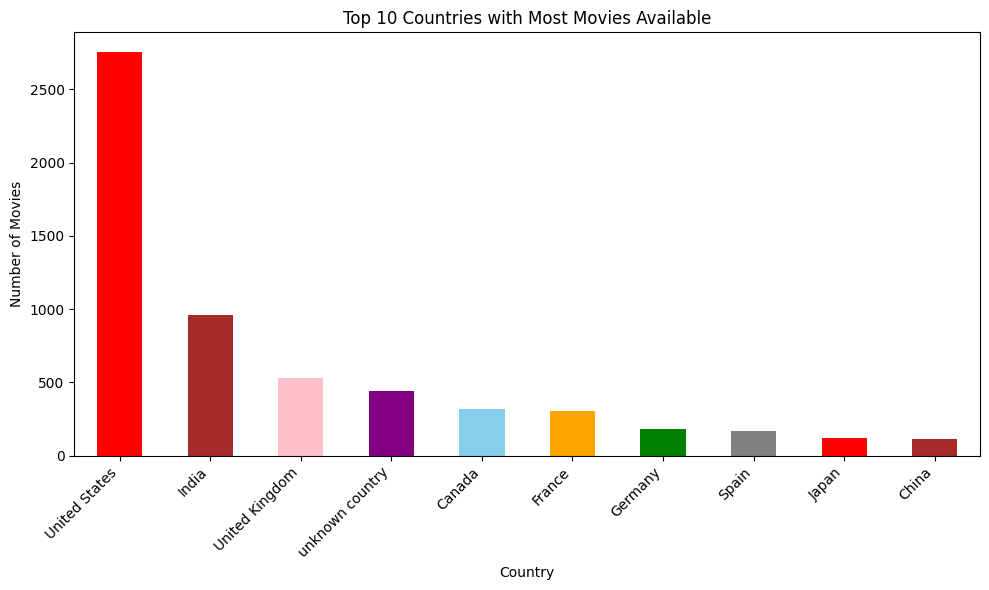

In [ ]:
colors = [ 'red', 'brown', 'pink', 'purple','skyblue', 'orange', 'green', 'gray']
top_10_movies.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Top 10 Countries with Most Movies Available')
plt.xlabel('Country')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

#b. Find the number of Tv-Shows produced in each country and pick the top 10 countries.

In [ ]:
movies_and_tvshows = movies_and_tvshows[movies_and_tvshows['country'] != 'unknown country']
top_10_tvshows=movies_and_tvshows[movies_and_tvshows['type']=='TV Show'].groupby('country')['title'].count().sort_values(ascending=False).head(10)
top_10_tvshows

country
United States     932
United Kingdom    271
Japan             198
South Korea       170
Canada            126
France             90
India              84
Taiwan             70
Australia          65
Spain              61
Name: title, dtype: int64

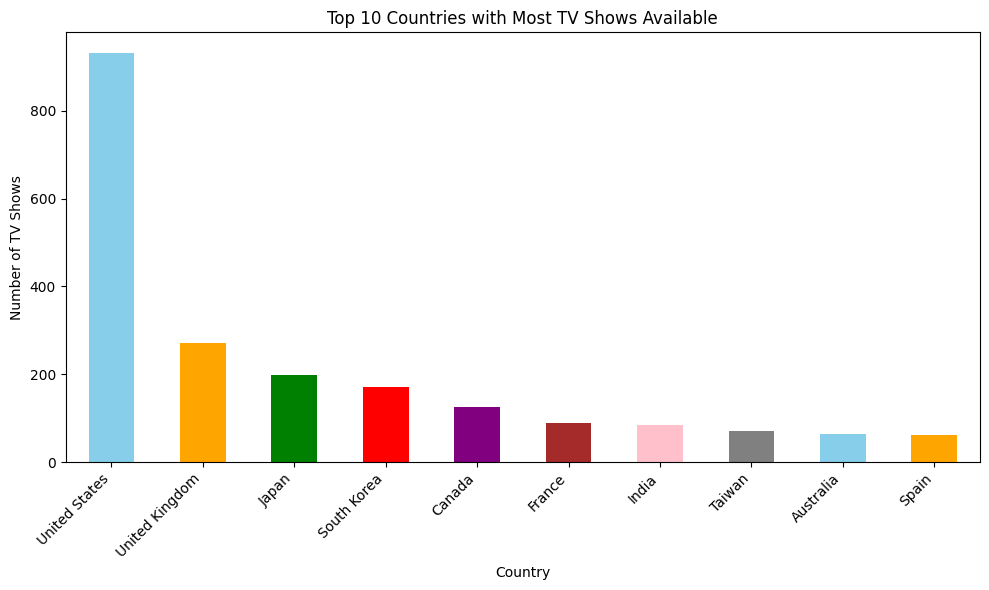

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray']
top_10_tvshows.plot(kind='bar', figsize=(10, 6), color=colors)

plt.title('Top 10 Countries with Most TV Shows Available')
plt.xlabel('Country')
plt.ylabel('Number of TV Shows')
plt.xticks(rotation=45, ha='right')  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

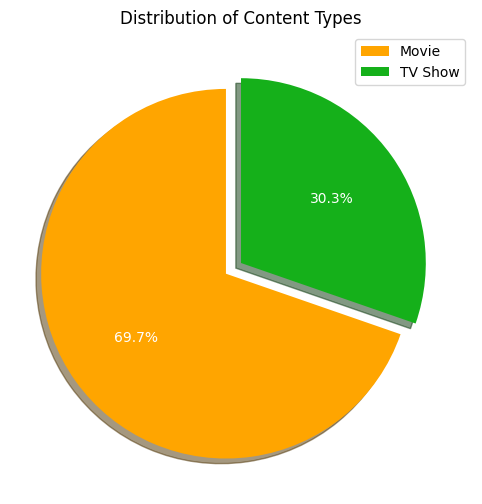

In [ ]:
x = df.groupby(['type'])['type'].count()
y = len(df)
r = ((x/y) * 100).round(2)

# Create a DataFrame to store the percentage distribution
mf_ratio = pd.DataFrame(r)
mf_ratio.rename({'type': '%'}, axis=1, inplace=True)

# Plot the 3D-effect pie chart
plt.figure(figsize=(10, 6))
colors = ['#ffa500', '#15b01a']
explode = (0.1, 0)
plt.pie(mf_ratio['%'], labels=mf_ratio.index, autopct='%1.1f%%',
colors=colors, explode=explode, shadow=True, startangle=90,
textprops={'color': 'white'})

plt.legend(loc='upper right')
plt.title('Distribution of Content Types')
plt.show()

In [ ]:
countries = country[country['country']!='unknown country']

In [ ]:
shows = pd.merge(countries,df[['title','type']],on='title',how='left')

In [ ]:
top10_countries = shows.groupby('country')['title'].count().sort_values(ascending=False).head(10)
coutries_contribution = countries['country'].apply(lambda x: x if x in top10_countries.index else 'Others' )
coutries_contribution

0        United States
1               Others
4                India
7        United States
8               Others
             ...      
10829           Others
10830    United States
10832    United States
10833    United States
10834            India
Name: country, Length: 10005, dtype: object

In [ ]:
countries = countries.merge(df[['title','type']],on='title',how='left')
top10_distribution = countries[countries['country'].isin(top10_countries.index)]
top10_distribution.reset_index(drop=True,inplace=True)

<Axes: xlabel='country', ylabel='count'>

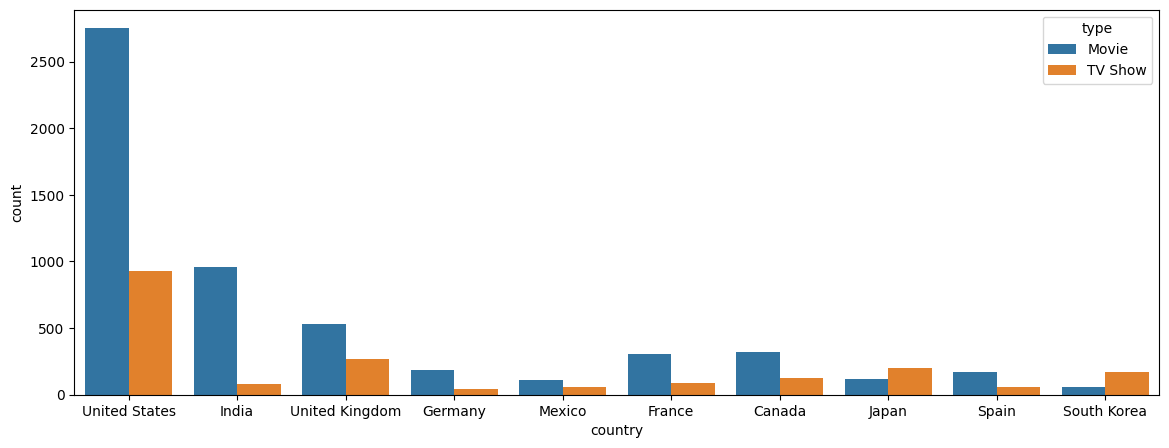

In [ ]:
plt.figure(figsize=(14,5))
sns.countplot(x='country',hue='type',data=top10_distribution)

**Insights**

* The data indicates a preference for movies over TV shows, with movies comprising 69% of the content, while TV shows make up 31%.

#3. What is the best time to launch a TV show?

#a. Find which is the best week to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df['week_number'] = df['date_added'].dt.isocalendar().week
# Group by week number and count the number of TV shows released each week
tv_show_weekly_count = df[df['type']=='TV Show'].groupby(by='week_number').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_tv_show_week = tv_show_weekly_count.idxmax()

print("Week with the highest number of TV show releases:", best_tv_show_week)
print("Number of TV show releases in the best week:", tv_show_weekly_count.max())

Week with the highest number of TV show releases: 27
Number of TV show releases in the best week: 86


In [ ]:
# Group by week number and count the number of movies released each week
Movie_weekly_count=df[df['type']=='Movie'].groupby(by='week_number').size().sort_values(ascending=False)
# Find the week with the highest number of movies releases
best_movie_week = Movie_weekly_count.idxmax()

print("Week with the highest number of movies releases:", best_movie_week)
print("Number of movies releases in the best week:", Movie_weekly_count.max())

Week with the highest number of movies releases: 1
Number of movies releases in the best week: 316


#b. Find which is the best month to release the Tv-show or the movie. Do the analysis separately for Tv-shows and Movies

In [ ]:
df['month_number'] = df['date_added'].dt.month
# Group by week number and count the number of TV shows released each week
tv_show_monthly_count = df[df['type']=='TV Show'].groupby(by='month_number').size().sort_values(ascending=False)
# Find the week with the highest number of TV show releases
best_tv_show_month = tv_show_weekly_count.idxmax()

print("Week with the highest number of TV show releases:", best_tv_show_month)
print("Number of TV show releases in the best week:", tv_show_monthly_count.max())

Week with the highest number of TV show releases: 27
Number of TV show releases in the best week: 266


In [ ]:
# Group by week number and count the number of movies released each week
Movie_monthly_count=df[df['type']=='Movie'].groupby(by='month_number').size().sort_values(ascending=False)
# Find the week with the highest number of movies releases
best_movie_week = Movie_monthly_count.idxmax()

print("Week with the highest number of movies releases:", best_movie_week)
print("Number of movies releases in the best week:", Movie_monthly_count.max())

Week with the highest number of movies releases: 7
Number of movies releases in the best week: 565


#4. Analysis of actors/directors of different types of shows/movies.

#a. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
directors = pd.merge(directors,df[['title','type']],on='title',how='left')
show = directors[directors['directors']!='unknown director']


In [ ]:
top_10_tv_shows_directors = show[show['type']=='TV Show'].groupby('directors').size().sort_values(ascending=False).head(10)
top_10_tv_shows_directors

directors
Ken Burns                3
Alastair Fothergill      3
Stan Lathan              2
Jung-ah Im               2
Joe Berlinger            2
Hsu Fu-chun              2
Gautham Vasudev Menon    2
Lynn Novick              2
Iginio Straffi           2
Shin Won-ho              2
dtype: int64

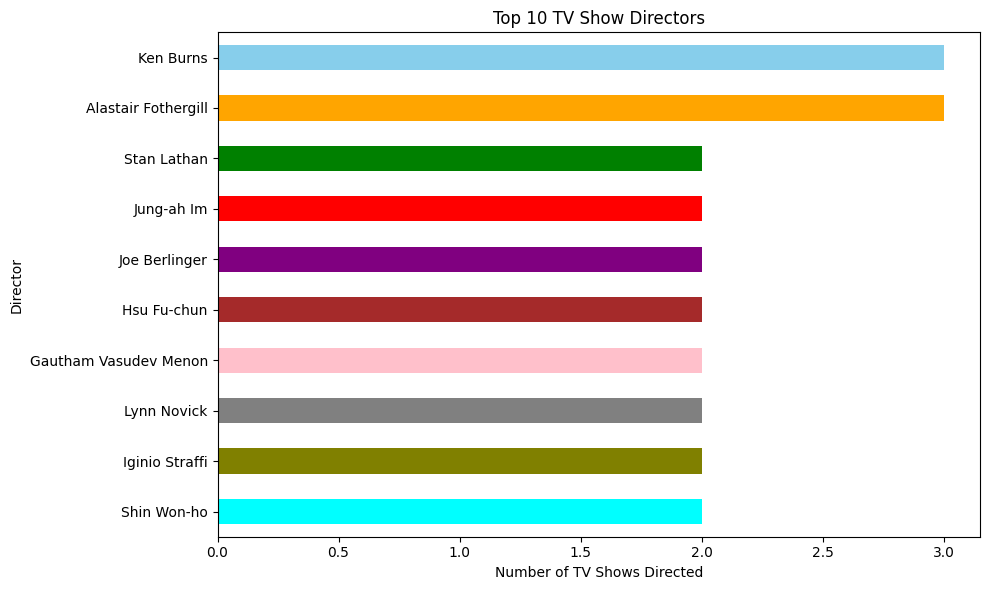

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray','olive', 'cyan']
plt.figure(figsize=(10, 6))
top_10_tv_shows_directors.plot(kind='barh', color=colors)

plt.title('Top 10 TV Show Directors')
plt.xlabel('Number of TV Shows Directed')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
top_10_movie_directors = show[show['type']=='Movie'].groupby('directors').size().sort_values(ascending=False).head(10)
top_10_movie_directors

directors
Rajiv Chilaka          22
Jan Suter              21
Raúl Campos            19
Suhas Kadav            16
Marcus Raboy           15
Jay Karas              15
Cathy Garcia-Molina    13
Jay Chapman            12
Martin Scorsese        12
Youssef Chahine        12
dtype: int64

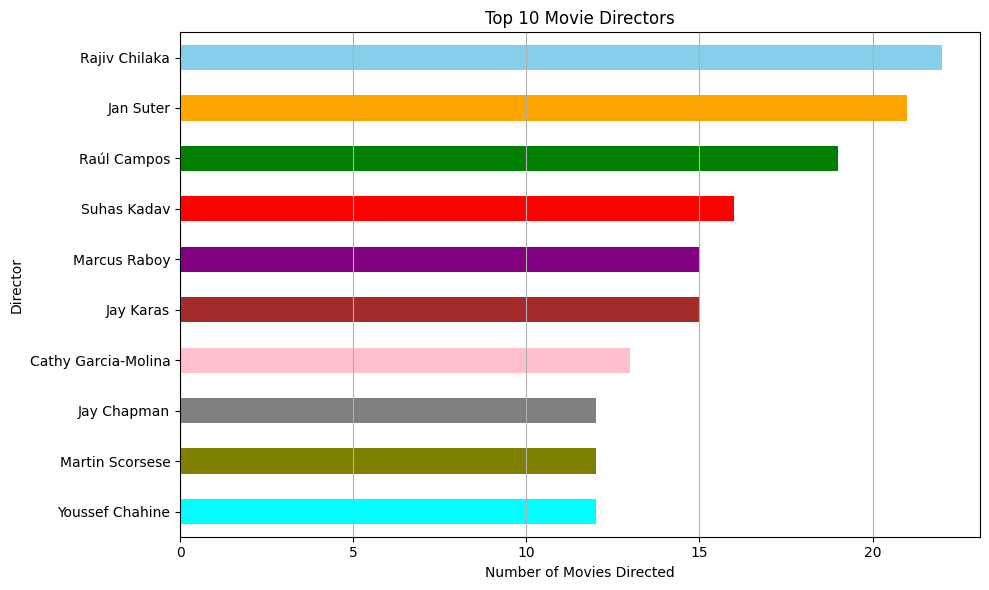

In [ ]:
colors = ['skyblue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray','olive', 'cyan']
plt.figure(figsize=(10, 6))
top_10_movie_directors.plot(kind='barh', color=colors)

plt.title('Top 10 Movie Directors')
plt.xlabel('Number of Movies Directed')
plt.ylabel('Director')
plt.gca().invert_yaxis()  # Invert y-axis to display the director with the highest count at the top
plt.grid(axis='x')  # Add vertical grid lines
plt.tight_layout()  # Adjust layout
plt.show()

#b. Identify the top 10 directors who have appeared in most movies or TV shows.

In [ ]:
cast = pd.merge(cast,df[['title','type']],on='title',how='left')
actors = cast[cast['cast']!='unknown actor']
# actors=actors.drop(['type_y'],axis=1).reset_index(drop=True)

In [ ]:
top_10_tv_shows_actors = actors[actors['type']=='TV Show'].groupby('cast').size().sort_values(ascending=False).head(10)
top_10_tv_shows_actors

cast
Takahiro Sakurai      25
Yuki Kaji             19
Ai Kayano             17
Daisuke Ono           17
Junichi Suwabe        17
Yuichi Nakamura       16
Jun Fukuyama          15
Yoshimasa Hosoya      15
David Attenborough    14
Hiroshi Kamiya        13
dtype: int64

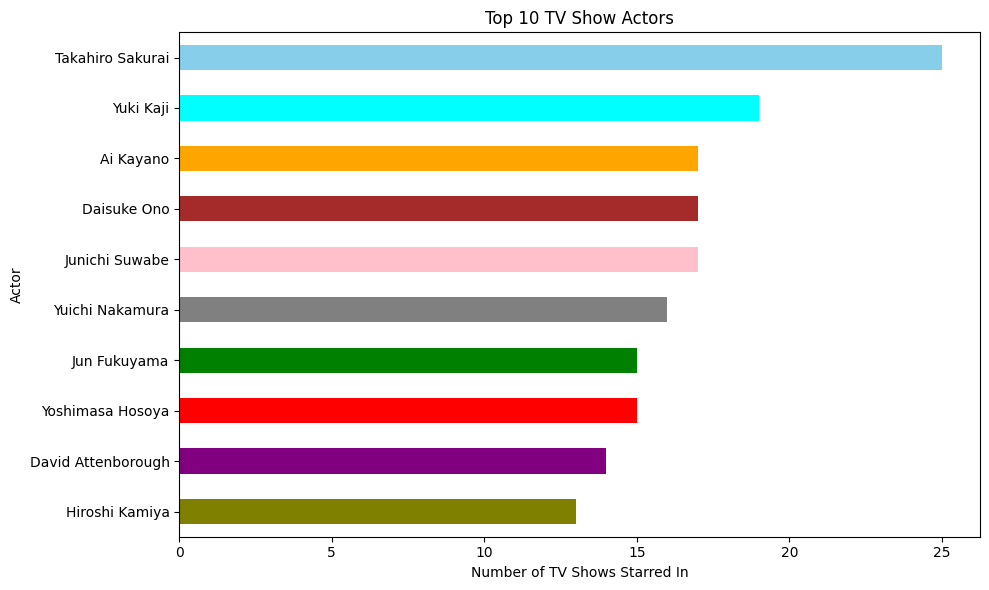

In [ ]:
colors = ['skyblue', 'cyan', 'orange',  'brown', 'pink', 'gray','green', 'red', 'purple','olive']
plt.figure(figsize=(10, 6))
top_10_tv_shows_actors.plot(kind='barh', color=colors)

plt.title('Top 10 TV Show Actors')
plt.xlabel('Number of TV Shows Starred In')
plt.ylabel('Actor')
plt.gca().invert_yaxis()  # Invert y-axis to display the actor with the highest count at the top

plt.tight_layout()  # Adjust layout
plt.show()

In [ ]:
top_10_movie_actors = actors[actors['type']=='Movie'].groupby('cast').size().sort_values(ascending=False).head(10)
top_10_movie_actors

cast
Anupam Kher         42
Shah Rukh Khan      35
Naseeruddin Shah    32
Om Puri             30
Akshay Kumar        30
Amitabh Bachchan    28
Julie Tejwani       28
Paresh Rawal        28
Rupa Bhimani        27
Boman Irani         27
dtype: int64

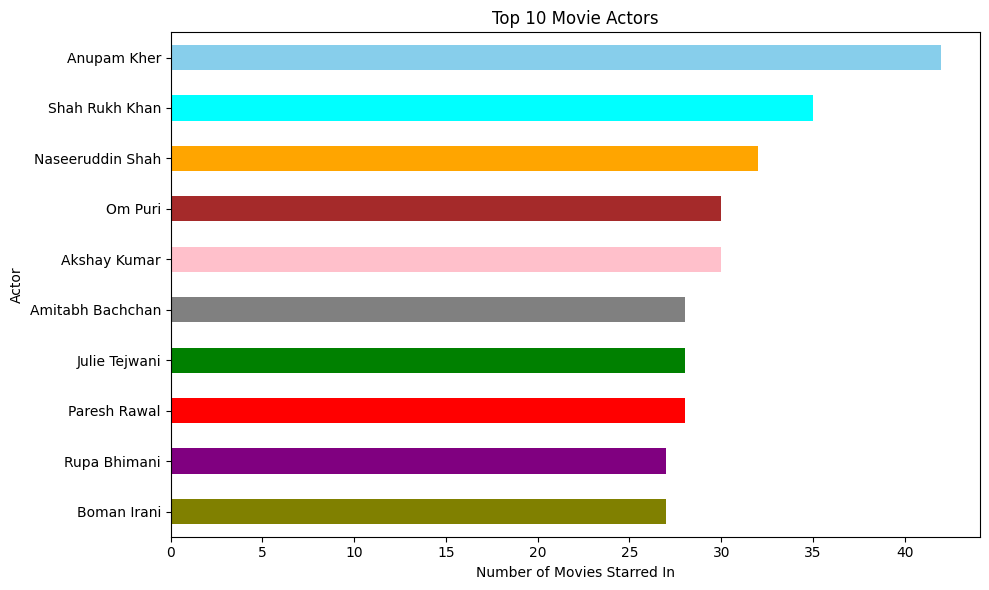

In [ ]:
colors = ['skyblue', 'cyan', 'orange',  'brown', 'pink', 'gray','green', 'red', 'purple','olive']
plt.figure(figsize=(10, 6))
top_10_movie_actors.plot(kind='barh', color=colors)

plt.title('Top 10 Movie Actors')
plt.xlabel('Number of Movies Starred In')
plt.ylabel('Actor')
plt.gca().invert_yaxis()  # Invert y-axis to display the actor with the highest count at the top

plt.tight_layout()  # Adjust layout
plt.show()

**Insights**
* TV show directors usually oversee a more evenly spread number of projects, with fewer shows assigned to each director.
* On the other hand, movie directors typically manage a heavier workload, often directing a larger number of films individually.
* TV show actors engage in a wider range of projects, with the top actor involved in 20+ shows, compared to movie actors, where the top actor appears in 40+ films.
* TV show actors often experience higher turnover due to the episodic nature of TV series, while movie actors may commit to longer-term projects, resulting in a more concentrated list.

#5. Which genre movies are more popular or produced more

In [ ]:
listed_in=pd.merge(listed_in,df[['title','type']],on='title',how='left')

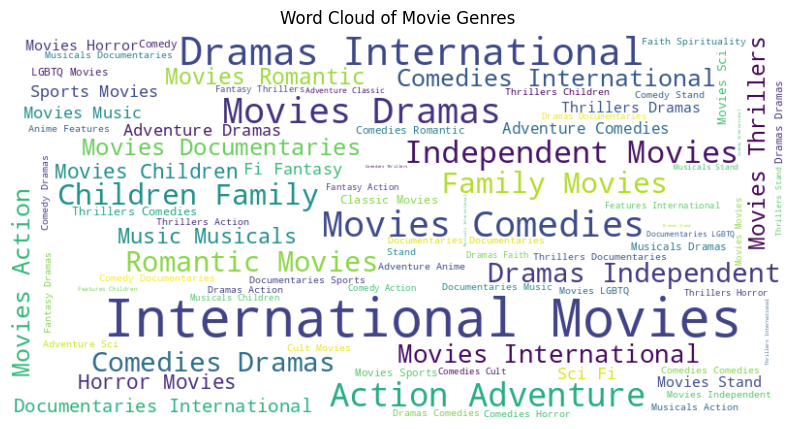

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Concatenate all genres into a single string
genres_text = ' '.join(listed_in[listed_in['type'] == 'Movie']['listed_in'])

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(genres_text)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Genres')
plt.axis('off')
plt.show()

#6. Find After how many days the movie will be added to Netflix after the release of the movie

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df['year'] = df['date_added'].dt.year
df['release_year'] =df['release_year'].astype('int64')
last_5_years_data = df[df['release_year']>=2017]
last_5_years_data['release_year'].unique()

array([2020, 2021, 2018, 2017, 2019])

In [ ]:
last_5_years_data['year']=last_5_years_data['year'].astype('int')

last_5_years_data['difference']=last_5_years_data['year']-last_5_years_data['release_year']
last_5_years_data['difference'].mode()

0    0
Name: difference, dtype: int64

<Axes: xlabel='release_year', ylabel='Count'>

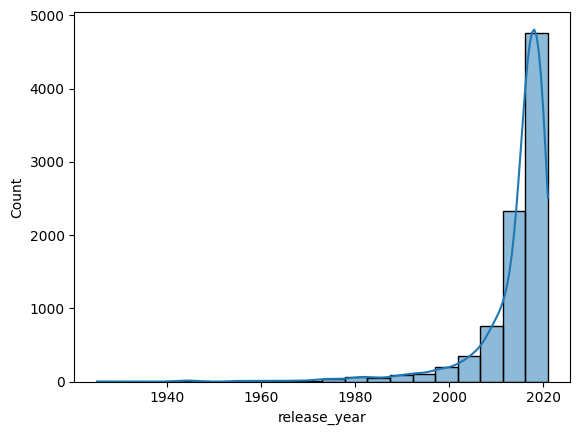

In [ ]:
sns.histplot(x='release_year',data=df,bins=20,kde=True)

**Insights**

* The highest volume of content production occurred in 2020.







#Some more analysis

#Lineplot on movies vs year

In [ ]:
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
year_vs_monthly = df[['title','type','year_added','month_added']].groupby(['year_added','month_added'])['title'].count().reset_index()

Text(0.5, 1.0, 'No of movies added in each year')

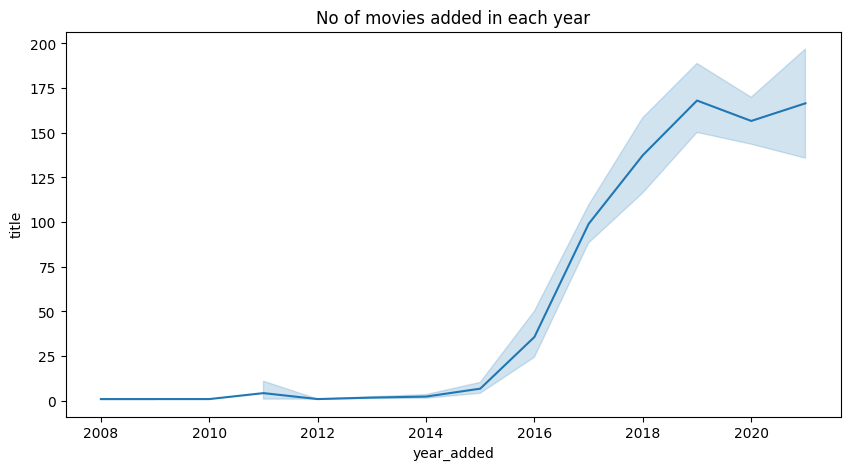

In [ ]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year_added',y='title',data=year_vs_monthly)
plt.title('No of movies added in each year')

**Insights**
* Starting from 2015, there has been steady growth, reaching its peak in 2020 with the highest amount of content produced.

#Heatmap on Rating over country

In [ ]:
df['rating'].unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR',
       'TV-Y7-FV', 'UR'], dtype=object)

* I excluded data points like '74 min', '84 min', '66 min' from the analysis as they didn't match any rating categories.

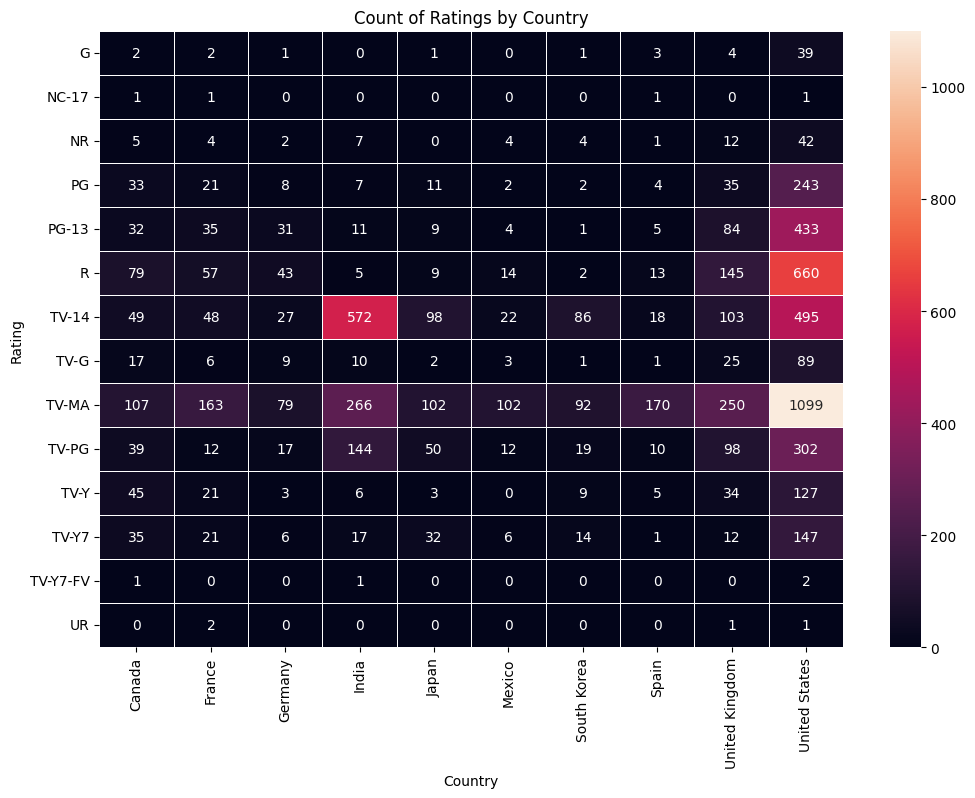

In [ ]:
countries = countries.merge(df[['title','rating']],on='title',how='left')
countries = countries[countries['rating'].isin(['PG-13', 'TV-MA', 'TV-14', 'TV-Y7', 'PG', 'R', 'TV-PG', 'TV-Y',
       'TV-G', 'G', 'NC-17', 'NR',
       'TV-Y7-FV', 'UR'])]

top_countries = countries[countries['country'].isin(top10_countries.index)]
top_countries.reset_index(drop=True,inplace=True)

rating_country_counts=top_countries.groupby(['rating', 'country']).size().unstack(fill_value=0)

plt.figure(figsize=(12, 8))
sns.heatmap(rating_country_counts, annot=True, fmt='d', linewidths=.5)
plt.title('Count of Ratings by Country')
plt.xlabel('Country')
plt.ylabel('Rating')
plt.show()

**Insights**
* Generally, Netflix features a significant amount of adult content across all countries, as indicated by TV-MA and TV-14 ratings.
* In India, there are many titles rated TV-PG, in addition to TV-MA and TV-14, while content appropriate for young viewers (TV-Y and TV-Y7) is exclusively found in the US, Canada, UK, France, and Japan.

#Boxplot on movie and tv-shows duration

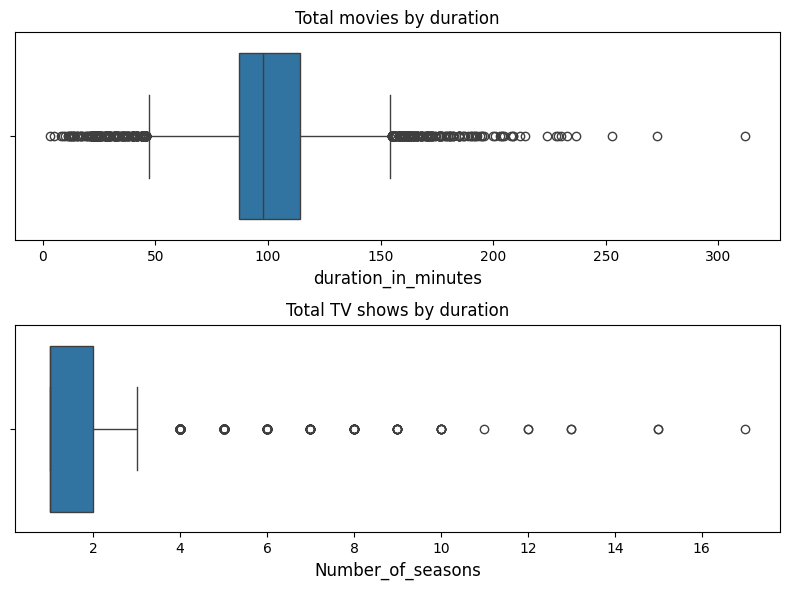

In [ ]:
fig, ax = plt.subplots(2,1, figsize=(8,6))

sns.boxplot (data = df , x = 'minutes' ,ax =ax[0])
ax[0].set_xlabel('duration_in_minutes' ,  fontsize = 12)
ax[0].set_title('Total movies by duration')

sns.boxplot (data = df , x = 'season' , ax = ax[1])
ax[1].set_xlabel('Number_of_seasons' ,  fontsize = 12)
ax[1].set_title('Total TV shows by duration')

plt.tight_layout()
plt.show()

**Insights**
* Movies usually last between 50 to 150 minutes, with some exceptions that might be much shorter or longer.
* TV shows typically have 1 to 3 seasons, although there are some with more or fewer seasons that are considered unusual.

#Overall Insights:

* Netflix's content is predominantly movies 70% and TV shows 30%

* International movies, dramas, and comedies are among the top genres on Netflix, with preferences varying by country.

* Most content is rated TV-MA, with the US offering a wider variety of ratings compared to other countries.

* Content Duration: Movies typically run between 50 to 150 minutes, while TV shows usually have 1 to 3 seasons.

* Shorter movies have gained popularity over the last decade.

* There was a slight decrease in new content in 2020 and 2021, especially for movies due to the pandemic.

* More than 80% of Netflix's content is rated TV-MA, TV-14, TV-PG, and R, aimed at mature and adult audiences. The remaining 20% is designed for children under 13 with parental guidance.

* About 75% of Netflix's shows and movies come from just the top 10 countries. This shows a big focus on those places. To grow more, Netflix could add more content from other countries.


#Recommendations

* Create or obtain shorter movies and limited series to meet the growing preference for concise entertainment options.

* Introduce custom plans and content collections designed for specific audience groups, such as families or younger viewers.

* Increase content acquisitions from regions outside the top 10 countries to enrich the library and attract a broader international audience.